# Part II -  Loan Data from Prosper
## by Rickson Osebe


## Effects of Loan characteristics on amount of loan awarded


> I am intrested in determing the essential features for determining the amount of loan that is awarded to an individual

> I will use these features: ListingCategory, IsBorrowerHomeowner, CurrentlyInGroup, DebtToIncomeRatio and StatedMonthlyIncome, to try and answer the question how loan characteristics affect amount of loan awarded.


## Dataset Overview

> The data set used contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# data wrangling, removing loans with inconsistent or missing data.

# being less than 0.4% we can filter out this outliers from our data
loan = loan[loan['DebtToIncomeRatio'] < 3]
#the percentage is less than 0.5, we can remove this outliers from our data
loan = loan[loan['StatedMonthlyIncome'] <= 25000]
#since nulls account to 2% of our data lets drop them
loan = loan[~loan['EmploymentStatus'].isna()]

In [4]:
# convert creditgrade and employment columns into ordered categorical types
creditgrades = {'CreditGrade' : ['NC', 'E',  'D', 'C', 'B', 'A', 'AA'],
               'EmploymentStatus' : ['Not employed', 'Other', 'Retired',  'Part-time', 
                                     'Full-time', 'Self-employed', 'Employed']}
for item in creditgrades:
    ordered_credit = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = creditgrades[item])
    loan[item] = loan[item].astype(ordered_credit)

## Distribution of loan amount

There are large spikes at 10000 and 15000 and some small spikes at 20000 and 35000. This implies the initial amount of loans that are usually lended to individuals.

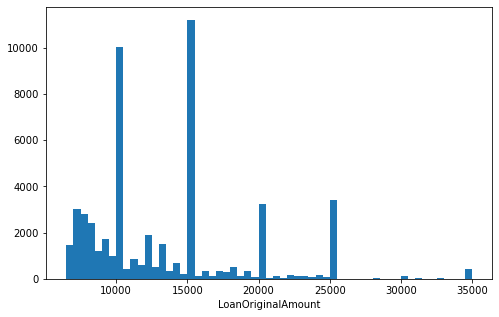

In [5]:
bins = np.arange(6500, loan['LoanOriginalAmount'].max()+500, 500)
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount')
plt.show()

## Distribution of stated monthly income

> we can observe that the statedmontlyincome is skewed to the right, with most of the individuals earning a monthly salary of not more than 25000.

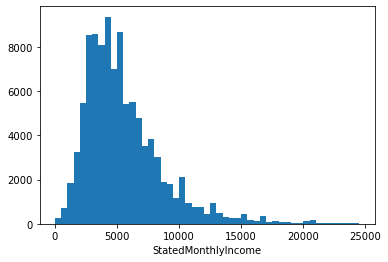

In [6]:
bins = np.arange(0, loan['StatedMonthlyIncome'].max(), 500)
plt.hist(data = loan, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('StatedMonthlyIncome')
plt.show()

## Loan amount, debttoincome ratio and stated monthly income vs categorical variables
It can be clearly observed that:
- The loanoriginalamount increases with better ratings, as there will be a lower risk of those with       good ratings paying off their loans
    
- The loanoriginalamount is seen to be higher for those employed and full-time. 
    
- Most of those taking loans can be noted as being non-members of groups, group members may acquire       loans from their groups so need to take prosperloans decreases.
    
- The debttoincome ratio can be noted to be almost indifferent among the different classes.
    
- Those earning higher montly income are associated with good ratings and they happen to be               individuals mostly with employment.



<Figure size 1440x1440 with 0 Axes>

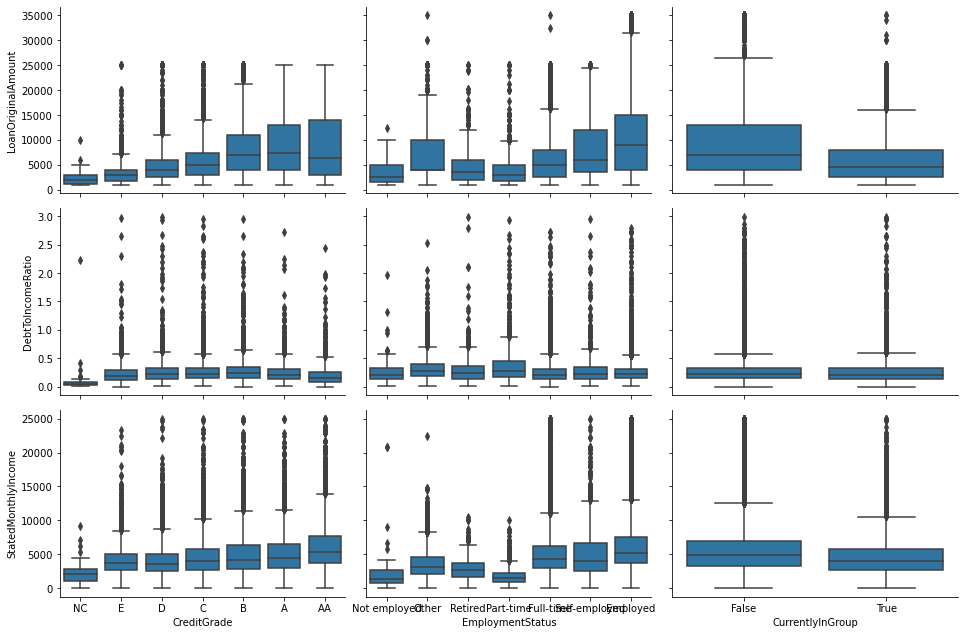

In [7]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

# Deprecated
# samples = np.random.choice(diamonds.shape[0], 2000, replace = False)

numeric_vars = ['LoanOriginalAmount', 'DebtToIncomeRatio', 'StatedMonthlyIncome']
categoric_vars = ['CreditGrade', 'EmploymentStatus','CurrentlyInGroup']


loan_samp = loan.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = loan, y_vars = numeric_vars, x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid);
plt.show();

## Stated monthly income and loan amount vs credit grades
- It is noted that the relationship between the loan amount and the stated monthly income is positively   skewed.
- Good ratings tend to affect both the loan amount and monthly income. The loan amount increases with     increased ratings and the monthly income tends to go to the same direction.

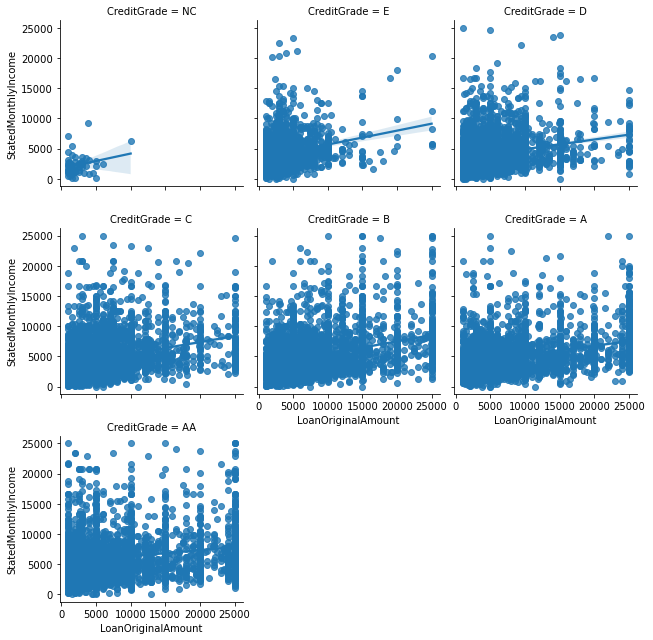

In [8]:
# create faceted heat maps on levels of the CreditGrade variable
g = sb.FacetGrid(data = loan, col = 'CreditGrade', col_wrap = 3, height = 3)
g.map(sb.regplot, 'LoanOriginalAmount', 'StatedMonthlyIncome', x_jitter=0.3)
g.add_legend();

plt.show()

## Stated monthly income and loan amount  vs employment status
with better employment status it can be observed that the stated monthly income keeps on improving. With worse employment status the salary is negatively affected.

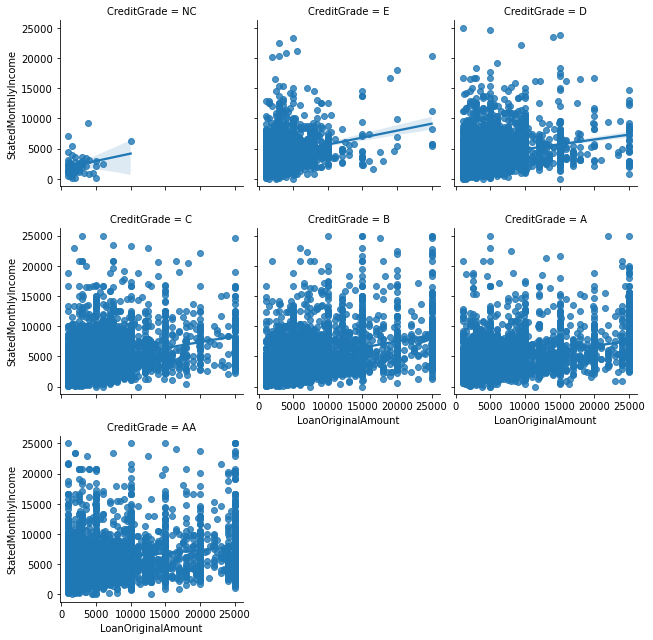

In [9]:
# create faceted heat maps on levels of the CreditGrade variable
g = sb.FacetGrid(data = loan, col = 'CreditGrade', col_wrap = 3, height = 3)
g.map(sb.regplot, 'LoanOriginalAmount', 'StatedMonthlyIncome', x_jitter=0.3)
g.add_legend();

plt.show()

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide.ipynb --to slides --post serve --no-input --no-prompt